In [1]:
from maelzel.core import *

In [2]:
struct = ScoreStruct(r'''
2/4, 60
2/4, 120
''')

In [15]:
sco = Score(scorestruct=struct)

notes = [Note(m, 0.25) for m in range(60, 84)]
scale = Chain(notes)
sco.append(scale.asVoice())

Score(1 voices)
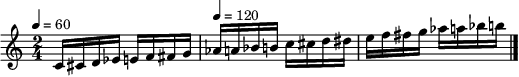

In [29]:
sco[0][0].setPlay(instr='saw', gain=0.1)
sco[0][3].setPlay(instr='saw', gain=0.1, position=1)
sco.setPlay(position=0)

In [31]:
sco.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=24)
    Synth(𝍪 preset.saw:501.0112, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=60 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset._piano:502.0252, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=61 ...)
    Synth(𝍪 preset._piano:502.0253, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=62 ...)
    Synth(𝍪 preset.saw:501.0113, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.1 ichan:9=1 ipos:10=1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=63 p21=0.515178 p22=0.25 ...)
    Synth(𝍪 preset._piano:502.0254, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset._piano:502.0255, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset._piano:502.0256, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=66 ...)
    Synth(𝍪 preset._piano:502.0257, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=67 ...)
    Synth(𝍪 preset._piano:502.0258, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=68 ...)
    Synth(𝍪 preset._piano:502.0259, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=69 ...)
    Synth(𝍪 preset._piano:502.026, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=70 ...)
    Synth(𝍪 preset._piano:502.0261, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=71 ...)
    Synth(𝍪 preset._piano:502.0262, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=72 ...)
    Synth(𝍪 preset._piano:502.0263, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=73 ...)
    Synth(𝍪 preset._piano:502.0264, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=74 ...)
    Synth(𝍪 preset._piano:502.0265, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=75 ...)
    Synth(𝍪 preset._piano:502.0266, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=76 ...)
    Synth(𝍪 preset._piano:502.0267, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=77 ...)
    Synth(𝍪 preset._piano:502.0268, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=78 ...)
    Synth(𝍪 preset._piano:502.0269, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=0 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 p15=0 p16=79 ...)
    Synth(𝍪 preset._pian